<a href="https://colab.research.google.com/github/elashgari/EEGNet/blob/master/Solution_HW7_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# for reproducibility I stored the code on Github
# so it would be at the same location everytime
url = "https://raw.githubusercontent.com/GregoryAlbarian/DataForCS530/main/Weekly.csv"
data = pd.read_csv(url)

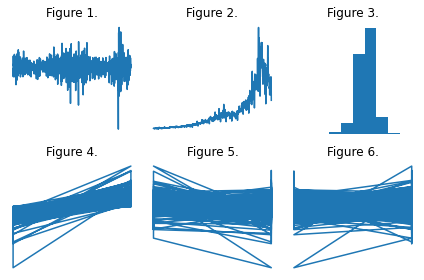

Figure 1. Weekly change of stock value
Figure 2. Weekly stock volume
Figure 3. Histogram of weekly change of stock value
Figure 4. Weekly change of stock value against current direction
Figure 5. Weekly change of stock value shifted by a week against current direction
Figure 6. Weekly change of stock value shifted by a week against current direction


In [ ]:
# Question a)

x_Year = data['Unnamed: 0']
y_Today = data['Today']
y_Yesterday = data['Lag1']
y_BeforeYesterday = data['Lag2']
y_Volume = data['Volume']
y_Direction = data['Direction']


figure, ax = plt.subplots(nrows = 2, ncols = 3)

ax.ravel()[0].plot(x_Year, y_Today)
ax.ravel()[0].set_title("Figure 1.")
ax.ravel()[0].set_axis_off()

ax.ravel()[1].plot(x_Year, y_Volume)
ax.ravel()[1].set_title("Figure 2.")
ax.ravel()[1].set_axis_off()

ax.ravel()[2].hist(y_Today)
ax.ravel()[2].set_title("Figure 3.")
ax.ravel()[2].set_axis_off()

ax.ravel()[3].plot(y_Direction, y_Today)
ax.ravel()[3].set_title("Figure 4.")
ax.ravel()[3].set_axis_off()

ax.ravel()[4].plot(y_Direction, y_Yesterday)
ax.ravel()[4].set_title("Figure 5.")
ax.ravel()[4].set_axis_off()

ax.ravel()[5].plot(y_Direction, y_BeforeYesterday)
ax.ravel()[5].set_title("Figure 6.")
ax.ravel()[5].set_axis_off()

plt.tight_layout()
plt.show()

print(
    "Figure 1. Weekly change of stock value",
    "Figure 2. Weekly stock volume",
    "Figure 3. Histogram of weekly change of stock value",
    "Figure 4. Weekly change of stock value against current direction",
    "Figure 5. Weekly change of stock value shifted by a week against current direction",
    "Figure 6. Weekly change of stock value shifted by a week against current direction", sep = "\n"
)


Question a)

In figure 1. we can see that there are periods with more change and periods with less change. This is interesting as it might reflect either natural fluctuations in the stock market or maybe some real world events. For instance, without knowing what this stock is, the massive fluctuation around 2008 might just reflect the financial crisis.

In figure 2. we can see that volume typically increases, but again around 2008 the volume starts dropping which might be a result of the financial crisis.

In figure 3. the histogram is centered around 0 indicating that stock has mostly retained its value over a 20 year period, the slight tilt to the right indicates that this stock has however slightly increased in value.

In figure 4. the plot is trivial as Direction is generated by the sign of Today, there is thus a slope in the graph indicating that values for change were higher when the stock was going up than when the stock was going down.

In figure 5. 6.
Here by adding a delay of 1 week or 2 week we can see that the slope becomes flat. This is interesting as it indicates that the change from more than a week ago brings little information when considering the actual direction of the stock value

In [ ]:
# Question b)

X = data[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
X = sm.add_constant(X)
Direction_temp = data[['Direction']]

Direction = (Direction_temp == "Up")
Direction = ~(Direction_temp == "Down")

logit_mod = sm.Logit(Direction, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                0.006580
Time:                        07:34:32   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Question b)

Considering the initial overview in question a) we did not expect any of the lags to influence the current direction. However, Lag2 is a significant coefficient. This is odd because one would expect that if Lag2 matters then Lag1 should matter too. This could indicate that this stock reacts according to a mechanism that has a 2 weeks delay (or reaction time).
No other coefficient is however significant which does confirm our expectations from question a). Further, the model is very poor with a Pseudo R-squared of 0.00658, indicating a poor fit.

Question c)

In [ ]:
from sklearn.metrics import confusion_matrix,  accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


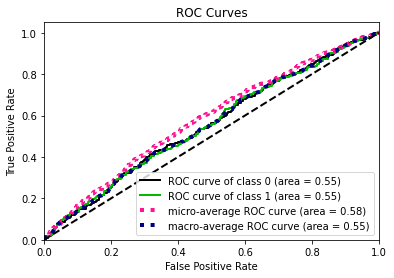

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = Direction*1
y_probas = logit_res.predict(X)
y_probas = np.array((1-y_probas,y_probas)).T
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [ ]:
y_true = Direction*1
y_pred = (logit_res.predict(X) <  0.682441)*1

score  = accuracy_score(y_true,y_pred)

con_matrix = pd.DataFrame(confusion_matrix(y_true, y_pred))

con_matrix.columns = ["P","N"]
con_matrix.index = ["P","N"]


print("Confusion Matrix")
print(con_matrix)
print("Score: ", score)


Confusion Matrix
   P    N
P  2  482
N  9  596
Score:  0.549127640036731


(d) Now fit the logistic-regression model using the data period from 1990 to 2008 as your training set, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). Put these into the table.

In [ ]:
train = data[(data['Year'] >= 1990) & (data['Year'] <= 2008)]


X = train['Lag2']
X = sm.add_constant(X)
Direction_temp = train['Direction']

Direction = (Direction_temp == "Up")
Direction = ~(Direction_temp == "Down")

logit_mod = sm.Logit(Direction, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                0.003076
Time:                        07:34:36   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [ ]:
#Get 2009-2010 Data
test = data[data['Year']>2008]

test_direction_temp = test['Direction']
test_direction = (test_direction_temp == "Up")
test_direction = ~(test_direction_temp == "Down")



X_test = test['Lag2']
X_test = sm.add_constant(X_test)

#Predict on held out data using 1990-2008 model
test_pred = (logit_res.predict(X_test) <  0.682441)*1

test_true = test_direction*1


score  = accuracy_score(test_true,test_pred)
con_matrix = pd.DataFrame(confusion_matrix(test_true, test_pred))
con_matrix.columns = ["P","N"]
con_matrix.index = ["P","N"]


print("Confusion Matrix")
print(con_matrix)
print("Score: ", score)

Confusion Matrix
   P   N
P  0  43
N  1  60
Score:  0.5769230769230769


(e) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results. Remember that the best results should be tested on held-out data. 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def logistic_model_stocks (variables_used):
  y_temp = data['Direction']
  y = (y_temp == "Up")
  y = ~(y_temp == "Down")

  X = data[variables_used]

  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=42)

  clf = LogisticRegression().fit(X_train, y_train)
  y_predicted = clf.predict(X_test)


  score  = accuracy_score(y_test, y_predicted)
  con_matrix = pd.DataFrame(confusion_matrix(y_test, y_predicted))
  con_matrix.columns = ["P","N"]
  con_matrix.index = ["P","N"]

  print("Confusion Matrix")
  print(con_matrix)
  print("Score: ", score)


In [ ]:
columns = ['Year', 'Lag1', 'Lag2', 'Lag3',	'Lag4',	'Lag5', 'Volume']
logistic_model_stocks (columns)
columns_used = " ".join(columns)
print("variables used: ", columns_used)

Confusion Matrix
    P    N
P  30  121
N  40  169
Score:  0.5527777777777778
variables used:  Year Lag1 Lag2 Lag3 Lag4 Lag5 Volume


In [ ]:
columns = ['Year', 'Lag2', 'Lag3',	'Lag4',	'Lag5', 'Volume']
logistic_model_stocks (columns)
columns_used = " ".join(columns)
print("variables used: ", columns_used)

Confusion Matrix
    P    N
P  23  128
N  30  179
Score:  0.5611111111111111
variables used:  Year Lag2 Lag3 Lag4 Lag5 Volume


In [ ]:
columns = ['Year', 'Lag1', 'Lag3',	'Lag4',	'Lag5', 'Volume']
logistic_model_stocks (columns)
columns_used = " ".join(columns)
print("variables used: ", columns_used)

Confusion Matrix
    P    N
P  18  133
N  34  175
Score:  0.5361111111111111
variables used:  Year Lag1 Lag3 Lag4 Lag5 Volume


In [ ]:
columns = ['Year', 'Lag1', 'Lag2', 'Lag4',	'Lag5', 'Volume']
logistic_model_stocks (columns)
columns_used = " ".join(columns)
print("variables used: ", columns_used)

Confusion Matrix
    P    N
P  31  120
N  42  167
Score:  0.55
variables used:  Year Lag1 Lag2 Lag4 Lag5 Volume


In [ ]:
columns = ['Year', 'Lag1',	'Lag4',	'Lag5', 'Volume']
logistic_model_stocks (columns)
columns_used = " ".join(columns)
print("variables used: ", columns_used)

Confusion Matrix
    P    N
P  16  135
N  27  182
Score:  0.55
variables used:  Year Lag1 Lag4 Lag5 Volume


In [ ]:
columns = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Volume']
logistic_model_stocks (columns)
columns_used = " ".join(columns)
print("variables used: ", columns_used)

Confusion Matrix
    P    N
P  29  122
N  32  177
Score:  0.5722222222222222
variables used:  Year Lag1 Lag2 Lag3 Volume


The last one I did produced the best results. The variables I used were Year, Lag1, Lag2, Lag3, and Volume. The tests in  part 2 were close in accuracy between with all between 50 and 60 per cent accuracy.